## Data Challenge 1

### Mei Tessum

In this data challenge, I will develop a model that predicts whether a biopsied breast cell is benign (not harmful) or malignant (cancerous), given a set of attributes about the cell. 

The dependent variable is a binary variable that contains data coded as 2 (benign) and 4 (malignant), therefore, I am going to build a predictive model using logistic regression. This logistic regression model will predict P(Y=4) (or the probability of having the biopsied breast cell as malignant) as a function of Xs.

First,I will make some assuptions:
The independent variables should be independent of each other.
The sample size is big enough.

In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [8]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
              names=["clump_thickness","cell_size_uniformity","cell_shape_uniformity",
                    "marginal_adhesion","single_epithelial_cell_size","bare_nuclei","bland_chromatin",
                    "normal_nucleoli","mitoses","class"])
df.head()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


I notice there are missing data in "bare_nuclei", and I would like to understand the reason why data goes missing by checking the whole detaset with missing data. 

In [9]:
df[df.bare_nuclei == "?"]

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
1057013,8,4,5,1,2,?,7,3,1,4
1096800,6,6,6,9,6,?,7,8,1,2
1183246,1,1,1,1,1,?,2,1,1,2
1184840,1,1,3,1,2,?,2,1,1,2
1193683,1,1,2,1,3,?,1,1,1,2
1197510,5,1,1,1,2,?,3,1,1,2
1241232,3,1,4,1,2,?,3,1,1,2
169356,3,1,1,1,2,?,3,1,1,2
432809,3,1,3,1,2,?,2,1,1,2
563649,8,8,8,1,2,?,6,10,1,4


In [10]:
df[df.bare_nuclei == "?"].groupby("class").median()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses
class,,,,,,,,
2,3.0,1.0,1.5,1.0,2.0,2.0,1.0,1.0
4,8.0,6.0,6.5,1.0,2.0,6.5,6.5,1.0


In [11]:
df[df.bare_nuclei != "?"].groupby("class").median()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses
class,,,,,,,,
2,3,1,1,1,2,2,1,1
4,8,6,6,5,5,7,6,1


I checked the median of each variable for both missing dataset and non-missing dataset, and found a difference in distribution of "marginal_adhesion" and "single_epithelial_cell_size" among malignant breat cell cases. Therefore, I decide those missing data are missing at random (the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data). Removing the data with missing values could be way way to deal with this issue, since the missing rate is also <5%.

In [12]:
#from fancyimpute import KNN

In [14]:
df= df[df.bare_nuclei != "?"]
df=df.astype('int64')
df.dtypes

clump_thickness                int64
cell_size_uniformity           int64
cell_shape_uniformity          int64
marginal_adhesion              int64
single_epithelial_cell_size    int64
bare_nuclei                    int64
bland_chromatin                int64
normal_nucleoli                int64
mitoses                        int64
class                          int64
dtype: object

In [15]:
df["class"][df['class']==2] = 0
df["class"][df['class']==4] = 1

In [16]:
df["class"].value_counts()

0    444
1    239
Name: class, dtype: int64

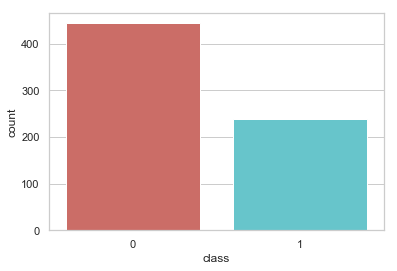

In [17]:
sns.countplot(x="class", data=df,palette="hls")
plt.show()
plt.savefig("count_plot")

In [18]:
count_benign = len(df[df['class']==0])
count_malignant = len(df[df['class']==1])
pct_of_malignant = count_malignant/(count_malignant+count_benign)
print("The percentage of malignant breat cell is", pct_of_malignant*100)
pct_of_benign = count_benign/(count_malignant+count_benign)
print("The percentage of benign breat cell is", pct_of_benign*100)

The percentage of malignant breat cell is 34.99267935578331
The percentage of benign breat cell is 65.00732064421669


Balanced dependent variable is improtant for logistic regression, and the ratio of malignant to benign breat call is 35:65, which indicates me to balance the class after doing data exploration.

In [19]:
df.groupby("class").mean()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
class,,,,,,,,,
0,2.963964,1.306306,1.414414,1.346847,2.108108,1.346847,2.083333,1.261261,1.065315
1,7.188285,6.577406,6.560669,5.585774,5.326360,7.627615,5.974895,5.857741,2.602510


Although have no idea what those independant variables mean, it seems high levels of independant variables tend to associate with malignant breast cell and low levels of independant variables tend to associate with benign breast cell. I notice here, the level of mitoses doesn't shown as large as of a difference in malignant and benign breast cell, but sitll follows the same pattern, and I will evaluate each feature's performance later. 

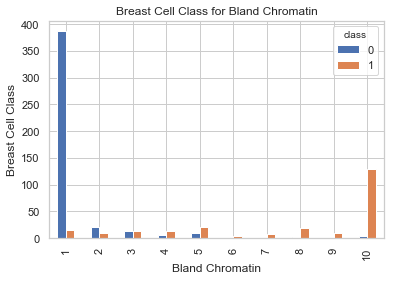

In [36]:
%matplotlib inline
pd.crosstab(df.bare_nuclei,df["class"]).plot(kind='bar')
plt.title('Breast Cell Class for Bland Chromatin')
plt.xlabel('Bland Chromatin')
plt.ylabel('Breast Cell Class')
plt.savefig('Cell_Class_for_Bland_Chromatin')

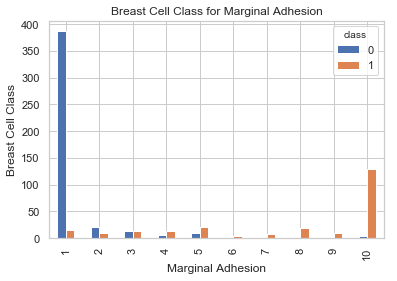

In [35]:
%matplotlib inline
pd.crosstab(df.bare_nuclei,df["class"]).plot(kind='bar')
plt.title('Breast Cell Class for Marginal Adhesion')
plt.xlabel('Marginal Adhesion')
plt.ylabel('Breast Cell Class')
plt.savefig('Cell_Class_for_Marginal_Adhesion')

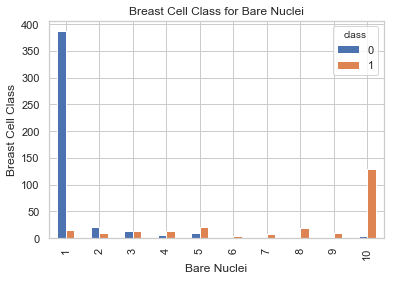

In [34]:
%matplotlib inline
pd.crosstab(df.bare_nuclei,df["class"]).plot(kind='bar')
plt.title('Breast Cell Class for Bare Nuclei')
plt.xlabel('Bare Nuclei')
plt.ylabel('Breast Cell Class')
plt.savefig('Cell_Class_for_Bare_Nuclei')

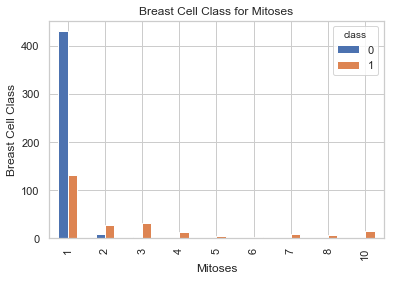

In [20]:
%matplotlib inline
pd.crosstab(df.mitoses,df["class"]).plot(kind='bar')
plt.title('Breast Cell Class for Mitoses')
plt.xlabel('Mitoses')
plt.ylabel('Breast Cell Class')
plt.savefig('Cell_Class_for_Mitoses')

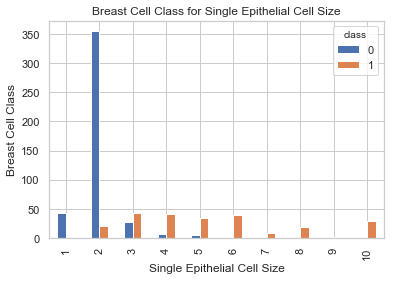

In [21]:
%matplotlib inline
pd.crosstab(df.single_epithelial_cell_size,df["class"]).plot(kind='bar')
plt.title('Breast Cell Class for Single Epithelial Cell Size')
plt.xlabel('Single Epithelial Cell Size')
plt.ylabel('Breast Cell Class')
plt.savefig('Cell_Class_for_single_epithelial_cell_size')

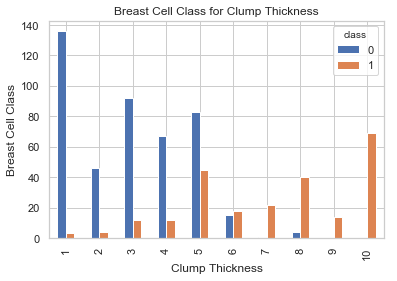

In [22]:
%matplotlib inline
pd.crosstab(df.clump_thickness,df["class"]).plot(kind='bar')
plt.title('Breast Cell Class for Clump Thickness')
plt.xlabel('Clump Thickness')
plt.ylabel('Breast Cell Class')
plt.savefig('Cell_Class_for_Clump_Thickness')

Now I will up-sample the malignant breast cancer cases using the SMOTE (Synthetic Minority Oversampling Technique) algorithm. This algorithm generates synthetic samples by randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

I will over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

In [23]:
X = df.loc[:, df.columns != 'class']
y = df.loc[:, df.columns == 'class']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train.values.ravel())
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['class'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of benign breast cancer in oversampled data",len(os_data_y[os_data_y['class']==0]))
print("Number of malignant breast cancer",len(os_data_y[os_data_y['class']==1]))
print("Proportion of benign breast cancer data in oversampled data is ",len(os_data_y[os_data_y['class']==0])/len(os_data_X))
print("Proportion of malignant breast cancer data in oversampled data is ",len(os_data_y[os_data_y['class']==1])/len(os_data_X))

length of oversampled data is  714
Number of benign breast cancer in oversampled data 357
Number of malignant breast cancer 357
Proportion of benign breast cancer data in oversampled data is  0.5
Proportion of malignant breast cancer data in oversampled data is  0.5


Now I have balanced data. 

### Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [24]:
df_vars=df.columns.values.tolist()
y=['class']
X=[i for i in df_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]


All the features seem play important roles, and therefore I will select them all.

### Implementing the model

In [26]:
cols=["clump_thickness","cell_size_uniformity","cell_shape_uniformity",
                    "marginal_adhesion","single_epithelial_cell_size","bare_nuclei","bland_chromatin",
                    "normal_nucleoli","mitoses"]
X=os_data_X[cols]
y=os_data_y['class']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.327280
         Iterations 8
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.528      
Dependent Variable:    class               AIC:                 485.3559   
Date:                  2019-02-14 21:39    BIC:                 526.4938   
No. Observations:      714                 Log-Likelihood:      -233.68    
Df Model:              8                   LL-Null:             -494.91    
Df Residuals:          705                 LLR p-value:         1.0655e-107
Converged:             1.0000              Scale:               1.0000     
No. Iterations:        8.0000                                              
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
clump_thickness  

The p-values for most of the variables are smaller than 0.05, except cell_shape_uniformity, therefore, I will remove it.

In [28]:
cols=["clump_thickness","cell_size_uniformity","marginal_adhesion","single_epithelial_cell_size","bare_nuclei","bland_chromatin",
                    "normal_nucleoli","mitoses"]
X=os_data_X[cols]
y=os_data_y['class']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.328087
         Iterations 8
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.527      
Dependent Variable:    class               AIC:                 484.5087   
Date:                  2019-02-14 21:40    BIC:                 521.0758   
No. Observations:      714                 Log-Likelihood:      -234.25    
Df Model:              7                   LL-Null:             -494.91    
Df Residuals:          706                 LLR p-value:         2.1023e-108
Converged:             1.0000              Scale:               1.0000     
No. Iterations:        8.0000                                              
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
clump_thickness  

After I rerun the model the p-values for all the variables are smaller than 0.05, and therefore this is our final model using to predict the class of breast cell.  

### Logistic Regression Model Fitting

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predicting the test set results and calculating the accuracy

In [30]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


### Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[67  1]
 [ 4 71]]


The result is telling us that we have 67+71 correct predictions and 4+1 incorrect predictions.

#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.99      0.96        68
          1       0.99      0.95      0.97        75

avg / total       0.97      0.97      0.97       143



Interpretation: Of the entire test set, 94% of the predicted benign breast cells cases were benign, 99% of all benign bearst cell cases are identified. Of the entire test set, 99% of the predicted malignant breast cell cases were malignant, 95% of all malignant bearst cell cases are identified.

### ROC Curve

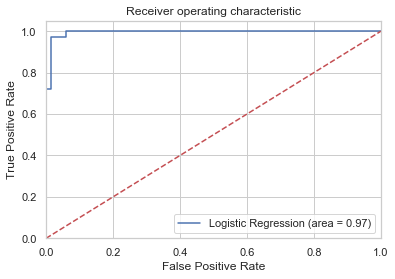

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner). This predictive model did good job on predicting breast cell class.